In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("cleaned_data.xlsx")  # หรือใช้ path ตามของคุณ

drop_cols = [
    "state", "Unnamed: 0", "blurb", "name", "created_at", "launched_at",
    "deadline", "state_changed_at", "creator_name", "location_name"
]
X = df.drop(columns=drop_cols, errors="ignore")
y = df["state"]

X = X.fillna(0)

mi_scores = mutual_info_classif(X, y, discrete_features="auto", random_state=0)
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

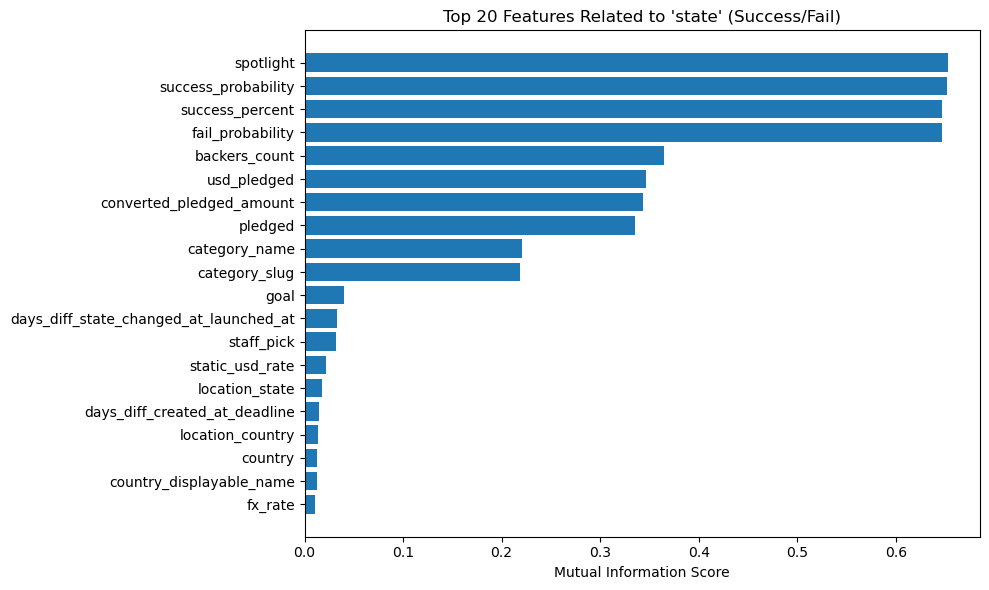

In [3]:
# แสดงผล 20 อันดับแรก
plt.figure(figsize=(10, 6))
plt.barh(mi_df["Feature"].head(20)[::-1], mi_df["MI Score"].head(20)[::-1])
plt.xlabel("Mutual Information Score")
plt.title("Top 20 Features Related to 'state' (Success/Fail)")
plt.tight_layout()
plt.show()